### Pandas P9

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
pd.set_option("display.max_columns",20)
plt.style.use('ggplot')

In [115]:
df = pd.read_csv(r'F:\Pandas Project 2024\Pandas DataSets\P9 IMDB-Movie-Data.csv')

In [116]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [117]:
# 1: first Rows of the dataset
df.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


In [118]:
# 2: last row of data set
df.tail(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [119]:
# 3: Shape of the data
df.shape
rows = df.shape[0]
cols = df.shape[1]
print(f"row are: ",rows)
print(f"cols are: ", cols)

row are:  1000
cols are:  12


In [120]:
rows = df.index.stop
cols = len(df.columns)
print(f"row are: ",rows)
print(f"cols are: ", cols)

row are:  1000
cols are:  12


In [121]:
# Info of the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [122]:
# Checking the null values in the data
df.isnull().values.any()       # Yes available

np.True_

In [123]:
# Lets check cols have null values
df.isna().sum() # The last 2 cols has null values

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [124]:
# lets check the percentage of null values
per_null  = df.isna().sum() * 100/len(df)

In [125]:
per_null

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

<Axes: >

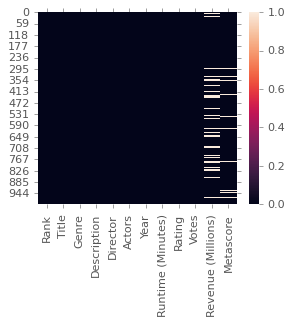

In [126]:
# Now let's visulaize them
plt.figure(figsize = (4,3))
sns.heatmap(df.isna())

In [127]:
# Now let's deleted the rows having null values
df.dropna(axis = 0, inplace = True)

In [128]:
df.isna().sum()      # After removal they are gone

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [129]:
# 6: Let's find out the duplicate in the data
df.duplicated().any()    # No duplicate available

np.False_

In [130]:
df['Title'].duplicated().any()    # Title are duplicated 

np.True_

In [131]:
# Let's find out duplicated title movies and thier details
dup = df[df['Title'].duplicated(keep = False)]

In [132]:
dup

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


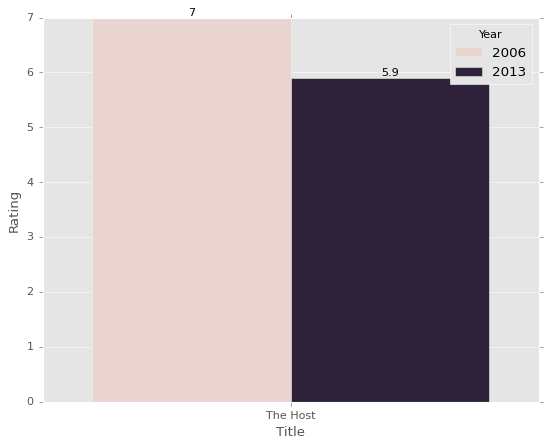

In [133]:
ax = sns.barplot(x = 'Title', y = 'Rating', hue = 'Year',data = dup)
for labels in ax.containers:
    ax.bar_label(labels)

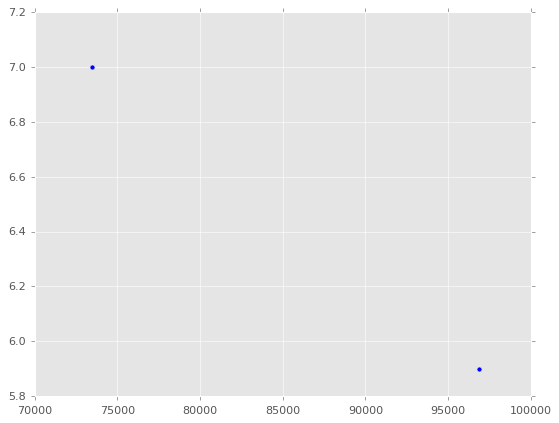

In [134]:
plt.scatter(x = 'Votes', y = 'Rating', data = dup)
plt.show()

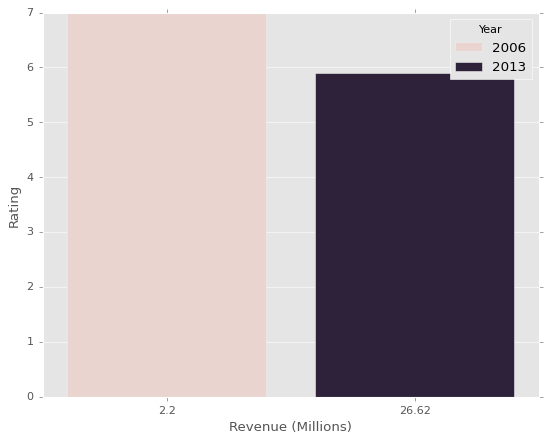

In [135]:
# A movie with high rating has less Reveanue. 
sns.barplot(x = 'Revenue (Millions)', y = 'Rating', hue = 'Year',data = dup)
plt.show()

In [136]:
# 8: Get the overall Stastics of the data
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [137]:
df[df['Rating'] == df['Rating'].min()]         # Movie with minimu Rating 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0


In [138]:
# (:Title of movies having run time greater or equal to 180
longMovies = df[df['Runtime (Minutes)'] >= 180]
longMovies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
311,312,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0


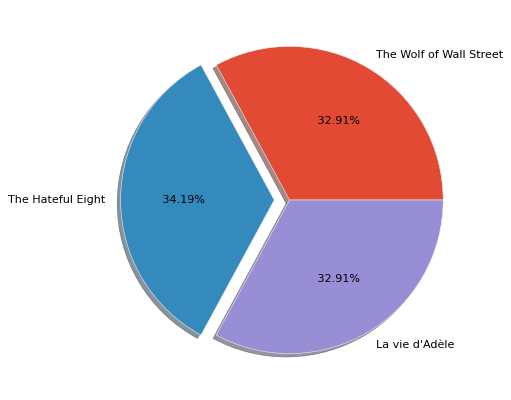

In [139]:
plt.pie(list(longMovies['Runtime (Minutes)']),labels = list(longMovies['Title']),autopct='% 0.2f%%',shadow = True, explode=[0,0.1,0])
plt.show()

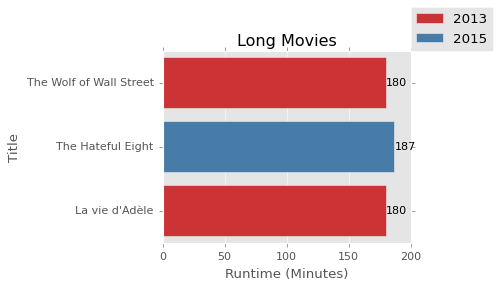

In [140]:
# But Pie is not the best option because it doesn't give enough info about the duration of the movies
plt.figure(figsize = (4,3))
ax = sns.barplot(y = 'Title', x = 'Runtime (Minutes)', data = longMovies, hue = 'Year', palette = 'Set1')
for lab  in ax.containers:
    ax.bar_label(lab)
plt.legend(loc = (1,1))
plt.title("Long Movies")
plt.show()

In [141]:
#10: in which year there was highest average rating
sortedVotes = df.groupby('Year')['Votes'].mean().sort_values(ascending = False) # The Year is 201

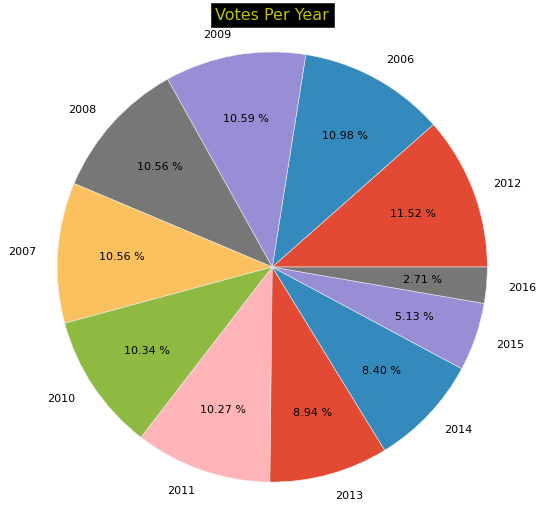

In [142]:
# We can Use Pi plot to see the percentage of Votes in Revenue
plt.pie(list(sortedVotes), labels = list(sortedVotes.index), autopct = '%0.2f %%',radius = 1.4,pctdistance=0.7)
plt.title('Votes Per Year',pad = 50,color = 'y',backgroundcolor = 'k')
plt.show()

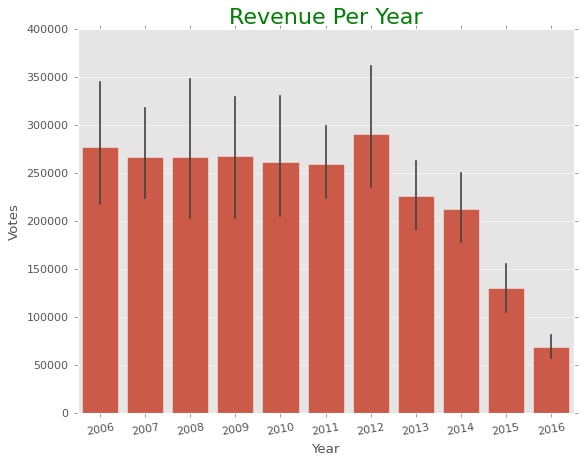

In [143]:
# To Visualize the above data
sns.barplot(x = 'Year', y = 'Votes', data = df)
plt.xticks(rotation = 10,size = 10)
plt.yticks(size = 10)
plt.title('Revenue Per Year', size =20,color = 'g' )
plt.show()

In [144]:
#11: In which year there was highest Average Revenue
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending = False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

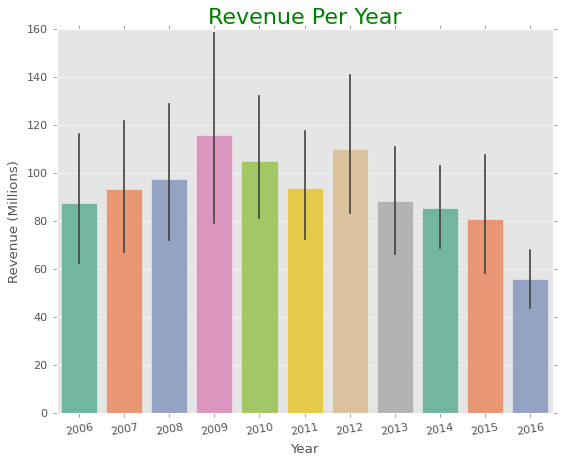

In [145]:
# To Visualize the Revenue Per Year
sns.barplot(x = 'Year', y = 'Revenue (Millions)', data = df, hue = 'Year',legend = False, palette = 'Set2')
plt.xticks(rotation = 10,size = 10)
plt.yticks(size = 10)
plt.title('Revenue Per Year', size =20,color = 'g' )
plt.show()

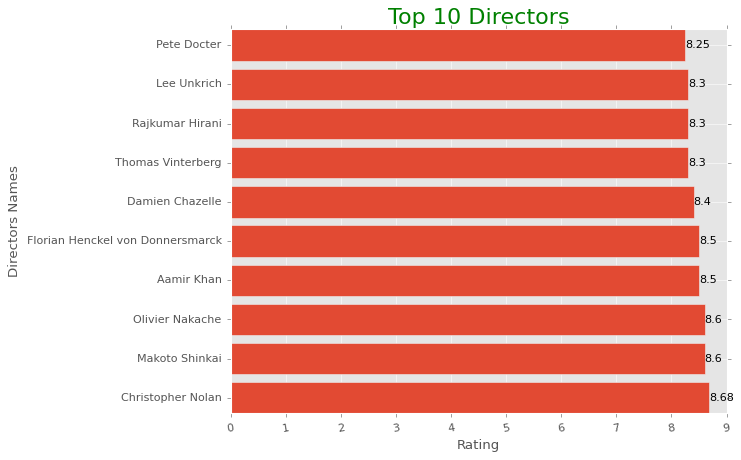

In [157]:
# 12: find the avg ratting for each director
top_10_Direc = list(df.groupby('Director')['Rating'].mean().sort_values(ascending = False).head(10).index)
top_10_Direc
top_10_rating = list(df.groupby('Director')['Rating'].mean().sort_values(ascending = False).head(10))
top_10_rating

ax = plt.barh(top_10_Direc,top_10_rating)
plt.xticks(rotation = 10,size = 10)
plt.yticks(size = 10)
plt.title('Top 10 Directors', size =20,color = 'g' )
plt.bar_label(ax,labels=top_10_rating)
plt.xlabel("Rating")
plt.ylabel("Directors Names")
plt.show()

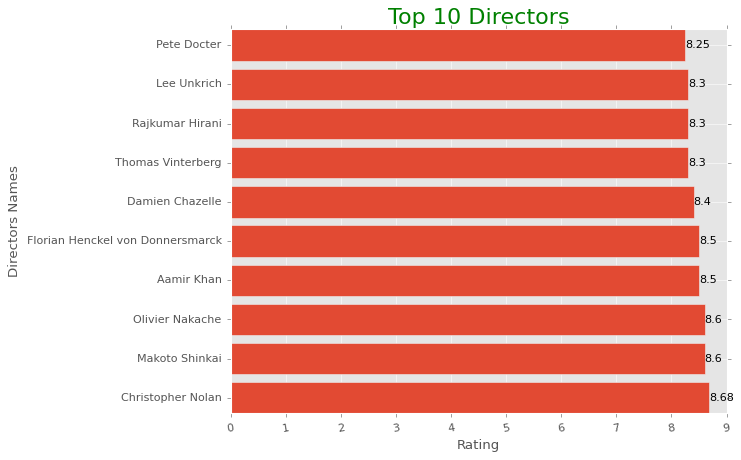

In [148]:
# Another Way to Simplify the above data of top_10 Directors and Their Rating

top_10 = df.nlargest(10,'Rating')[['Director','Rating','Title']].set_index('Director')
top_10

,Rating,Title
Director,,
Christopher Nolan,9.0,The Dark Knight
Christopher Nolan,8.8,Inception
Christopher Nolan,8.6,Interstellar
Makoto Shinkai,8.6,Kimi no na wa
Olivier Nakache,8.6,The Intouchables
Christopher Nolan,8.5,The Prestige
Martin Scorsese,8.5,The Departed
Christopher Nolan,8.5,The Dark Knight Rises
Damien Chazelle,8.5,Whiplash


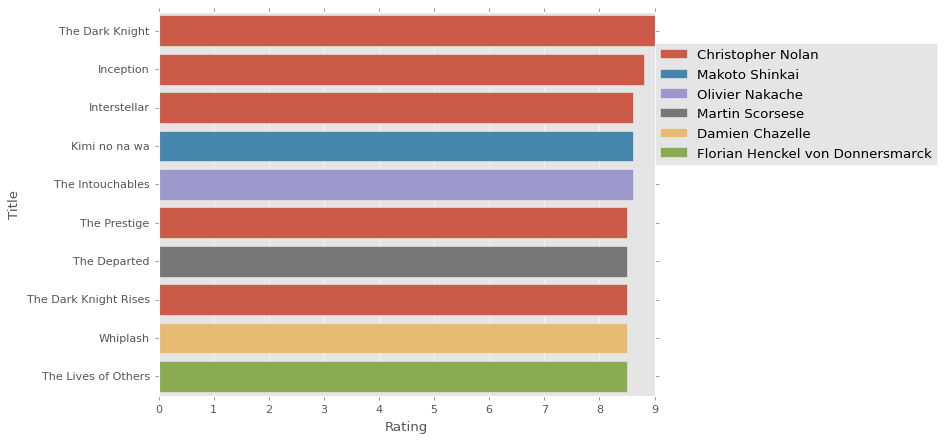

In [149]:
sns.barplot(x = 'Rating', y = 'Title', data = top_10, hue =top_10.index,legend = True )
plt.legend(loc = (1,0.6))
plt.show()

In [150]:
#13: Longest Titles and runtime
longest_movies = df.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)','Director']].set_index('Title')
longest_movies

,Runtime (Minutes),Director
Title,,
The Hateful Eight,187,Quentin Tarantino
The Wolf of Wall Street,180,Martin Scorsese
La vie d'Adèle,180,Abdellatif Kechiche
Cloud Atlas,172,Tom Tykwer
3 Idiots,170,Rajkumar Hirani
Interstellar,169,Christopher Nolan
Pirates of the Caribbean: At World's End,169,Gore Verbinski
The Hobbit: An Unexpected Journey,169,Peter Jackson
The Curious Case of Benjamin Button,166,David Fincher


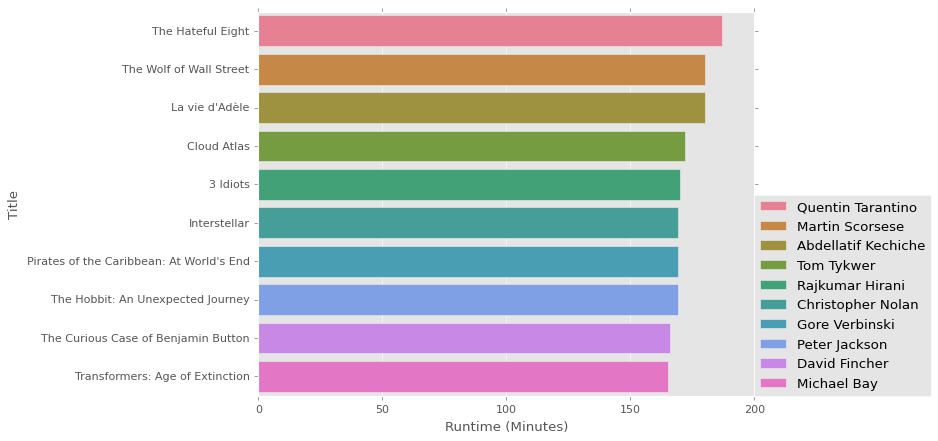

In [151]:
sns.barplot(x = 'Runtime (Minutes)', y = longest_movies.index,data = longest_movies, hue = 'Director')
plt.legend(loc = (1,0))

In [152]:
#14: Display number of movies per year

# df.groupby('Year')['Title'].count()          or we can use value_counts() 

df['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2010     57
2011     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

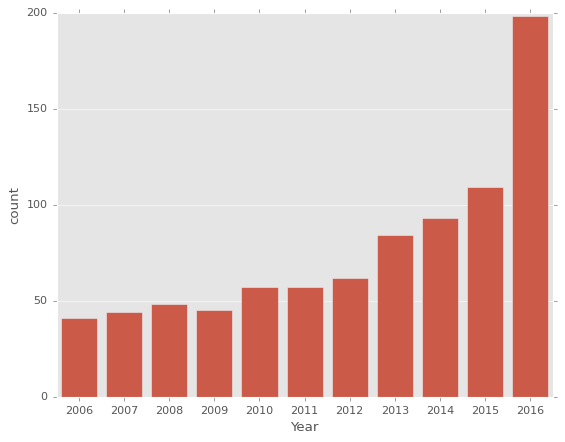

In [153]:
sns.countplot(x = 'Year',data = df)

In [156]:
#15: find most popular movie title (Revenue)
df[df['Revenue (Millions)'] == df['Revenue (Millions)'].max()]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [154]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [164]:
# 17: top 10 highest Revenue movies Director
HighRevenueMovies = df.nlargest(10,'Revenue (Millions)')[['Title','Director', 'Revenue (Millions)']].set_index('Title')
HighRevenueMovies

,Director,Revenue (Millions)
Title,,
Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63
Avatar,James Cameron,760.51
Jurassic World,Colin Trevorrow,652.18
The Avengers,Joss Whedon,623.28
The Dark Knight,Christopher Nolan,533.32
Rogue One,Gareth Edwards,532.17
Finding Dory,Andrew Stanton,486.29
Avengers: Age of Ultron,Joss Whedon,458.99
The Dark Knight Rises,Christopher Nolan,448.13


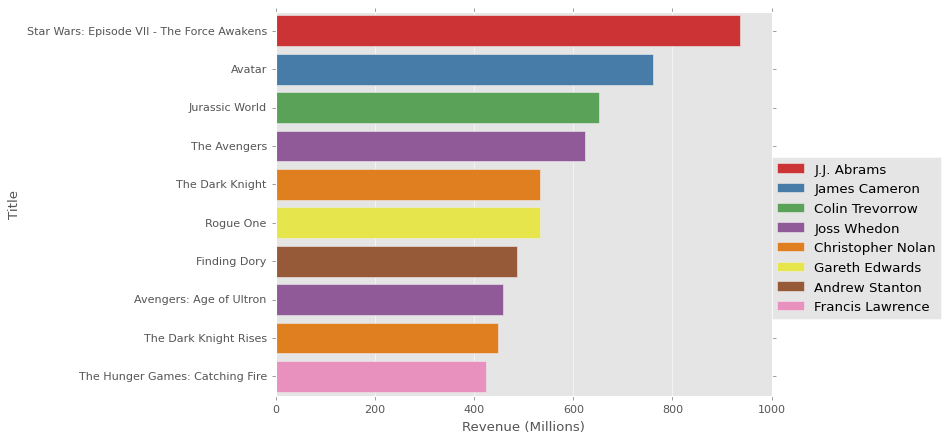

In [170]:
sns.barplot(x = 'Revenue (Millions)',y = HighRevenueMovies.index, data = HighRevenueMovies, hue = 'Director', palette = 'Set1')
plt.legend(loc = (1,0.2))
plt.show()

In [175]:
# 18: Find avg ratting yearwise
df.groupby('Year')['Rating'].mean().sort_values(ascending = False)

Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

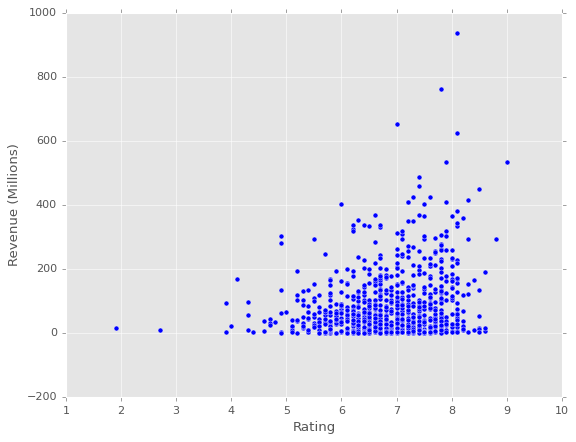

In [179]:
# Does Rating Affects the Revenue
sns.scatterplot( x = 'Rating', y = 'Revenue (Millions)',data = df)
plt.show()
# Yes greater the ratting higher will be the revenue


In [180]:
# Categorize on the basis of rating. maker your own scale
def Rat(rat):
    if rat >=8:
        return 'Excelent'
    elif rat >=6:
        return 'Good'
    else:
        return 'Average'

In [181]:
df['Rat_EGA']  = df['Rating'].apply(Rat)

In [183]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rat_EGA
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excelent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good


In [186]:
# Count the number of Action movies
sum(df['Genre'].str.contains('Action', case = False))

277

In [202]:
# Unique Genre: As every movie has been put in different categoris. so let's find them out
from collections import Counter
mycoun = Counter()
for cat in df['Genre']:
    mycoun.update(cat.split(','))
lst = []
for key in mycoun:
    lst.append(key)
print(lst)
print(len(lst))

['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music', 'Biography', 'Romance', 'History', 'Western', 'Crime', 'War', 'Musical', 'Sport']
20


0      None
1      None
2      None
3      None
4      None
       ... 
993    None
994    None
996    None
997    None
999    None
Name: Genre, Length: 838, dtype: object